#Importing DataSet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

#Training Image Preprocessing

In [ ]:
Training_DataSet = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Fruits_Vegetales_Recognition/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [ ]:
Validation_DataSet = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Fruits_Vegetales_Recognition/validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
CNN = tf.keras.models.Sequential()

#Building Convolution Layers

In [ ]:
CNN.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , padding='same' , activation='relu' , input_shape=[64,64,3]))
CNN.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
CNN.add(tf.keras.layers.Dropout(0.25))

In [ ]:
CNN.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu' ))
CNN.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [ ]:
CNN.add(tf.keras.layers.Dropout(0.25))

In [ ]:
CNN.add(tf.keras.layers.Flatten())

In [ ]:
CNN.add(tf.keras.layers.Dense(units=512 , activation='relu'))

In [ ]:
CNN.add(tf.keras.layers.Dense(units=256 , activation='relu'))

In [ ]:
CNN.add(tf.keras.layers.Dropout(0.5))

In [ ]:
CNN.add(tf.keras.layers.Dense(units=36 , activation='softmax'))

#Compiling &Training

In [ ]:
CNN.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Training_History = CNN.fit(x=Training_DataSet , validation_data = Validation_DataSet , epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 934s 9s/step - accuracy: 0.0273 - loss: 18.6219 - val_accuracy: 0.0769 - val_loss: 3.4791
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 696ms/step - accuracy: 0.0599 - loss: 3.4741 - val_accuracy: 0.0855 - val_loss: 3.2984
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 687ms/step - accuracy: 0.0775 - loss: 3.3256 - val_accuracy: 0.1538 - val_loss: 3.0624
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 702ms/step - accuracy: 0.0942 - loss: 3.2302 - val_accuracy: 0.2422 - val_loss: 2.9730
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 676ms/step - accuracy: 0.1192 - loss: 3.1152 - val_accuracy: 0.3191 - val_loss: 2.6803
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 692ms/step - accuracy: 0.1694 - loss: 2.9132 - val_accuracy: 0.4302 - val_loss: 2.4189
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 678ms/step - accuracy: 0.2128 - loss: 2.7742 - val_accuracy: 0.4786 - val_loss: 2.1850
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 699ms/step - accuracy: 0.2641 - loss: 2.5207 - val_accur

#Evaluating Model

In [ ]:
Train_Loss , Train_Accuracy = CNN.evaluate(Training_DataSet)
print("The Training Accuracy: " , Train_Accuracy)

98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 655ms/step - accuracy: 0.8398 - loss: 0.5976
The Training Accuracy:  0.8298555612564087


In [ ]:
Validation_Loss , Validation_Accuracy = CNN.evaluate(Validation_DataSet)
print("The Validation Accuracy: " , Validation_Accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 798ms/step - accuracy: 0.8623 - loss: 0.5684
The Validation Accuracy:  0.8404558300971985


#Saving Model

In [ ]:
CNN.save('/content/drive/MyDrive/Trained_Model.keras')

In [ ]:
Training_History.history

{'accuracy': [0.03146067261695862,
  0.056179776787757874,
  0.08025681972503662,
  0.0969502404332161,
  0.1284109205007553,
  0.17335473001003265,
  0.22600321471691132,
  0.27319422364234924,
  0.3357945382595062,
  0.3878009617328644,
  0.4394863545894623,
  0.48507222533226013,
  0.5123595595359802,
  0.544462263584137,
  0.5662921071052551,
  0.5871589183807373,
  0.6301765441894531,
  0.6282504200935364,
  0.6597110629081726,
  0.6500802636146545,
  0.6934189200401306,
  0.7043338418006897,
  0.6943820118904114,
  0.7242375612258911,
  0.7245585918426514,
  0.7277688384056091,
  0.7290529608726501,
  0.7473515272140503,
  0.74703049659729,
  0.7585874795913696,
  0.7730336785316467,
  0.7813804149627686],
 'loss': [7.347105026245117,
  3.4553744792938232,
  3.297999143600464,
  3.2137656211853027,
  3.080939531326294,
  2.8930869102478027,
  2.7339937686920166,
  2.490112066268921,
  2.3046512603759766,
  2.146013021469116,
  1.9594496488571167,
  1.7549872398376465,
  1.6826250

In [ ]:
import json
with open('Training_History.json' , 'w') as f:
  json.dump(Training_History.history , f)

In [ ]:
print(Training_History.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(Training_History.history['val_accuracy'][-1]*100))

Validation set Accuracy: 84.04558300971985 %


#Training Visualization

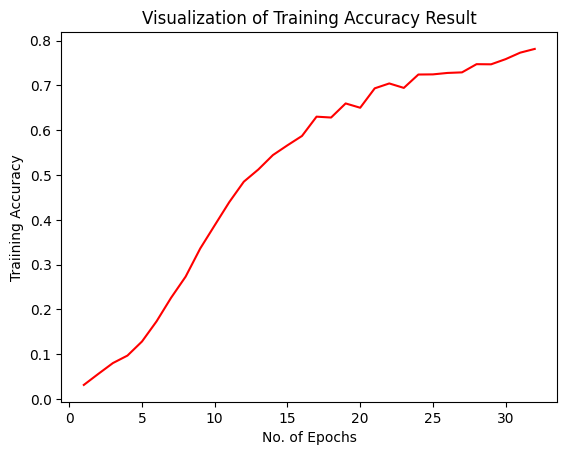

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,Training_History.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

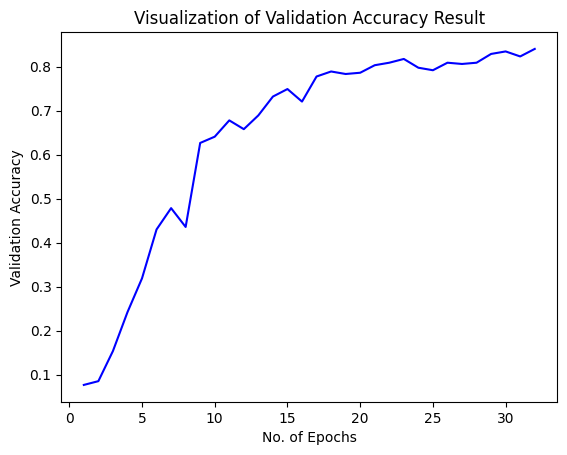

In [ ]:
plt.plot(epochs,Training_History.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [ ]:
Testing_DataSet = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetales_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
Test_Loss,Test_Accuracy = CNN.evaluate(Testing_DataSet)
print('Test accuracy:', Test_Accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 875ms/step - accuracy: 0.8653 - loss: 0.6966
Test accuracy: 0.835654616355896


#Loading Model

In [3]:
CNN = tf.keras.models.load_model('/content/drive/MyDrive/Trained_Model.keras')

#Visualising and Performing Prediction on Single image

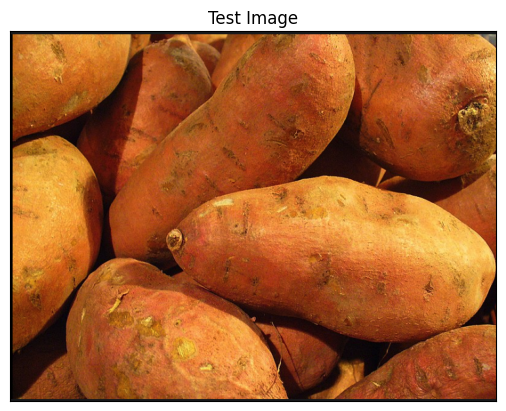

In [9]:
Image_Path = 'food5.png'
Image = cv2.imread(Image_Path)
Image = cv2.cvtColor(Image , cv2.COLOR_BGR2RGB)
plt.imshow(Image)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
Image = tf.keras.preprocessing.image.load_img(Image_Path , target_size=(64,64))
Input_Array = tf.keras.preprocessing.image.img_to_array(Image)
Input_Array = np.array([Input_Array])
Predictions = CNN.predict(Input_Array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [11]:
print(Predictions)

[[0.00440349 0.00399938 0.03025259 0.06265032 0.00071828 0.08393314
  0.07593879 0.00343706 0.13864456 0.00601479 0.00084443 0.00566794
  0.00708226 0.00093268 0.0042568  0.03563398 0.00162519 0.005334
  0.00136983 0.0282324  0.00998103 0.00275472 0.05108434 0.00248262
  0.00066291 0.03376562 0.0342015  0.03074285 0.05336059 0.00391268
  0.00020661 0.00143215 0.06825694 0.00364607 0.03132641 0.17121102]]


In [12]:
Result_Index = np.argmax(Predictions)
print(Result_Index)

35


In [13]:
Class_Names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'papaya', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon'] # Define the Class_Names variable with a list of possible classifications
print("it is ",Class_Names[Result_Index])

it is  watermelon
